In [2]:
# cv2 é usado para ler imagens
import cv2
import matplotlib
# pyplot é usado para mostrar as imagens
import matplotlib.pyplot as plt


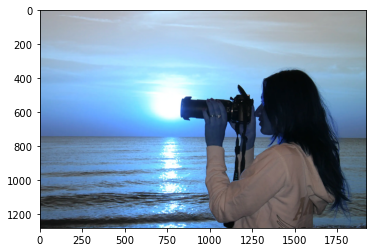

In [8]:
# cv2.imread() le arquivos de imagem
imagem = cv2.imread("imgs/garota.webp")
# pyplot.imshow() mostra a imagem
# o OpenCV por padrão abre as imagens no formato BGR
# Pyplot usa o padrão RGB
# A imagem vai ficar com cores estranhas
plt.imshow(imagem)

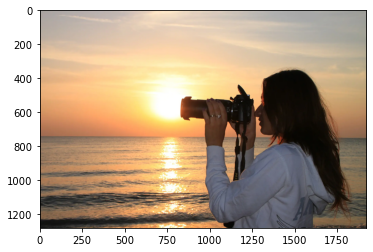

In [9]:
# .cvtColor() vai converter as cores da imagem
# BGR to RGB
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)

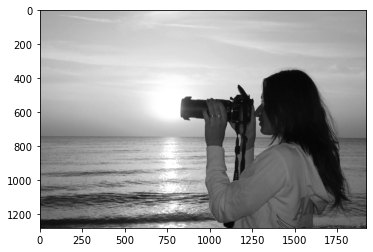

In [12]:
# converte para escala de cinza. Arquivo mais leve, menos informação para computar. Melhor em certos casos
imagem_gray = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2GRAY)
# precisa de um parametro a mais informando pyplot que a imagem está em escala de cinza
plt.imshow(imagem_gray, cmap="gray")

In [14]:
print("tamanho da imagem colorida: ", imagem_rgb.shape)
print("tamanho da imagem cinza: ", imagem_gray.shape)

tamanho da imagem colorida:  (1280, 1920, 3)
tamanho da imagem cinza:  (1280, 1920)


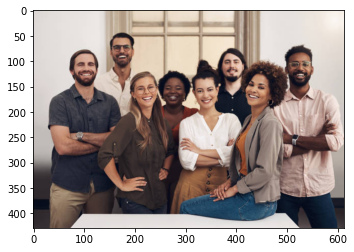

In [27]:
pessoas = cv2.imread("imgs/people.jpg")
pessoas = cv2.cvtColor(pessoas, cv2.COLOR_BGR2RGB)
pessoas_gray = cv2.cvtColor(pessoas, cv2.COLOR_RGB2GRAY)
plt.imshow(pessoas)

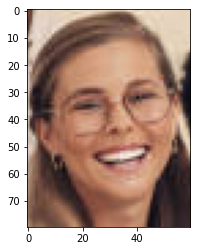

In [25]:
# you can cut a piece with img[initial_height:end_height, initial_width:end_width]
# regioes especificas são chamadas de ROI, regiões de interesse (region of interest)
img_roi = pessoas[120:200, 190:250]
plt.imshow(img_roi)

In [24]:
# antes de salvar a imagem, temos que passar o esquema de cores de volta para BGR
# cv2 so usa bgr
img_roi = cv2.cvtColor(img_roi, cv2.COLOR_RGB2BGR)
# imwrite para salvar imagens
cv2.imwrite("imgs/rosto.png", img_roi)

True

In [30]:
# arquivo pode ser encontrado no github do opencv/data
classificador = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default_xml")

# segundo parametro faz o programa diminuir a imagem antes de procurar rostos
# conforme diminui, a qualidade aumenta e facilita encontrar rostos
# 1.3 significa 30%. O ideal são taxas para escalas menores, como 1.1
# terceiro parametro é o rigor com que o classificador vai procurar rostos.
# Quanto mais rigor, mais certeza e menos rostos encontrados. 5 é padrão
rostos = classificador.detectMultiScale(pessoas_gray, 1.3, 5)

In [31]:
len(rostos)

8

In [33]:
# salva os resultados em uma array
rostos[0]
# retorna as coordenadas x, y e largura w e altura h

array([148,  53,  54,  54], dtype=int32)

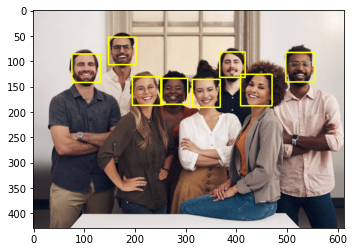

In [34]:
imagem_marcada = pessoas
for (x, y, w, h) in rostos:
    # desenha um retangulo na imagem, no ponto (x, y) até o ponto (x+w, y+h)
    # com a cor (255, 255, 0) e espessura 2
    cv2.rectangle(imagem_marcada, (x, y), (x+w, y+h), (255, 255, 0), 2)
    
plt.imshow(imagem_marcada)

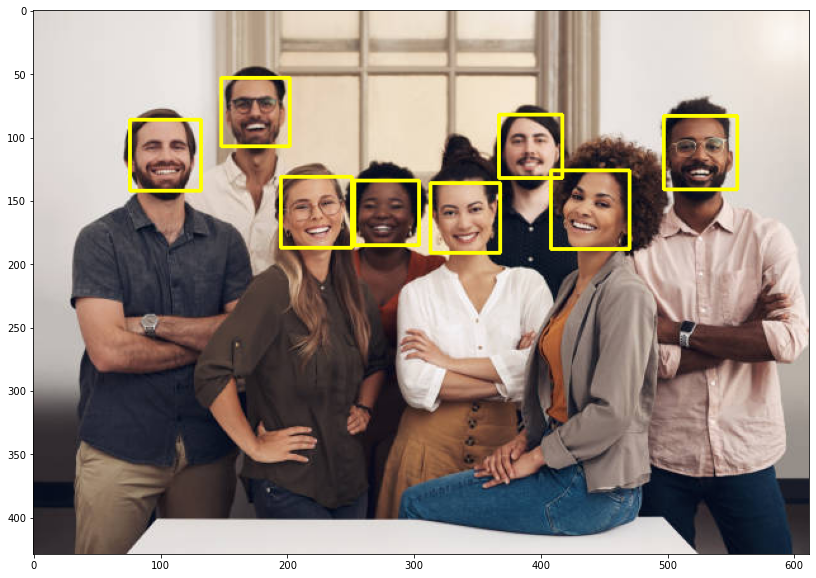

In [35]:
# show image bigger
plt.figure(figsize=(20,10))
plt.imshow(imagem_marcada)

In [37]:
# salvando essas faces
contador = 0
for (x,y,w,h) in rostos:
    contador += 1
    # recorta o rosto
    img_roi = pessoas[y:y+h, x:x+w]
    img_roi = cv2.cvtColor(img_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("imgs/rosto_" + str(contador) + ".png", img_roi)

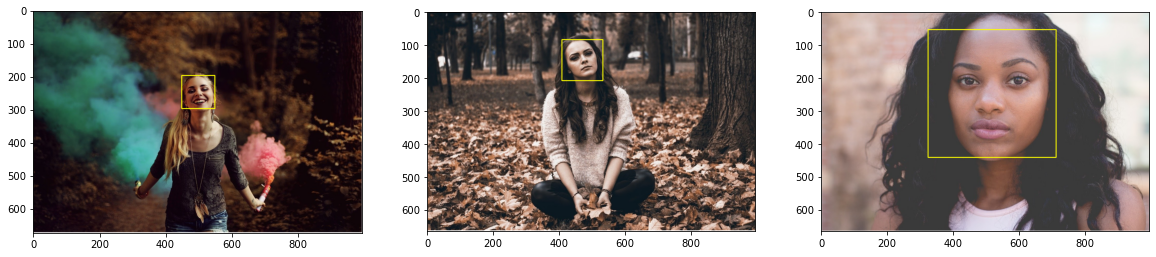

In [4]:
## desafio
imagem1 = cv2.imread("imgs/desafio_haar1.png", )
imagem1 = cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB)
imagem1_gray = cv2.cvtColor(imagem1, cv2.COLOR_RGB2GRAY)

imagem2 = cv2.imread("imgs/desafio_haar2.png")
imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)
imagem2_gray = cv2.cvtColor(imagem2, cv2.COLOR_RGB2GRAY)

imagem3 = cv2.imread("imgs/desafio_haar3.png")
imagem3 = cv2.cvtColor(imagem3, cv2.COLOR_BGR2RGB)
imagem3_gray = cv2.cvtColor(imagem3, cv2.COLOR_RGB2GRAY)

classificador = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default_xml")
rosto_imagem_1 = classificador.detectMultiScale(imagem1_gray, 1.3, 5)
rosto_imagem_2 = classificador.detectMultiScale(imagem2_gray, 1.3, 5)
rosto_imagem_3 = classificador.detectMultiScale(imagem3_gray, 1.3, 5)

def marca_retangulo(imagem, rostos):    
    imagem_marcada = imagem.copy()
    for (x, y, w, h) in rostos:
        cv2.rectangle(imagem_marcada, (x, y), (x+w, y+h), (255, 255, 0), 2)
    return imagem_marcada
    
imagem_marcada_1 = marca_retangulo(imagem1, rosto_imagem_1)
imagem_marcada_2 = marca_retangulo(imagem2, rosto_imagem_2)
imagem_marcada_3 = marca_retangulo(imagem3, rosto_imagem_3)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(imagem_marcada_1)
plt.subplot(132)
plt.imshow(imagem_marcada_2)
plt.subplot(133)
plt.imshow(imagem_marcada_3)

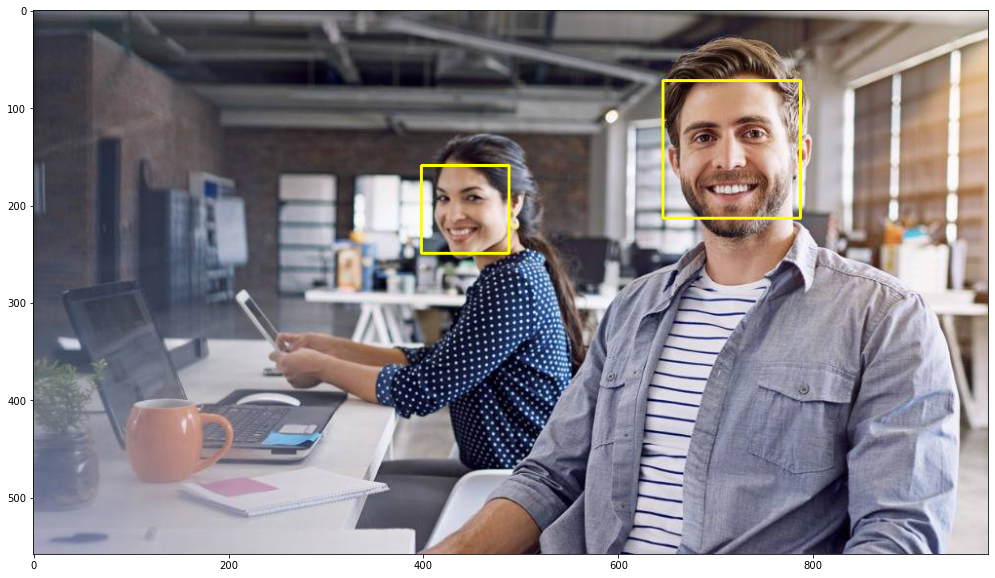

In [34]:
# Conclusao
import cv2
import matplotlib.pyplot as plt

def get_rgb_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_face_rectangle_coordinates(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    classifier = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default_xml")
    face_coordinates = classifier.detectMultiScale(image_gray, 1.25, 10)
    
    return face_coordinates

def draw_rectangle(image, points):    
    new_image = image.copy()
    for (x, y, w, h) in points:
        cv2.rectangle(new_image, (x, y), (x+w, y+h), (255, 255, 0), 2)
    return new_image

def detect_face(image_path):
    image = get_rgb_image(image_path)
    
    face_coordinates = get_face_rectangle_coordinates(image)
    
    return draw_rectangle(image, face_coordinates)
    

plt.figure(figsize=(20,10))
plt.imshow(detect_face("imgs/teste_haar.jpg"))
